In [67]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import isodate
from collections import Counter, defaultdict


import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

In [68]:
#load gz_df
all_df = pd.read_csv('new_youtube_video.csv')

all_df.head()

,video_id,title,description,tags,category_id,view_count,like_count,dislike_count,comment_count,duration,...,channel_description,published_at,channel_creation_date,duration_seconds,weighted_views,length_category,upload_day,upload_hour,title_length,description_length
0,2XLnR2HlmBU,Compact Verbot: Faeser massiv unter Druck!,Prof. Vosgerau übt massive Kritik an Faesers C...,[],27,71231,11255,0,953,PT10M32S,...,"Ich erstelle Videos über Dinge, die mich beweg...",2013-11-28T10:40:22Z,2013-11-28T10:40:22Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SjnWd_j7wZQ,ن سوشل میڈیا کی PTI خاتون MNA کی جعلی گندی وڈی...,Today's Punjabi Vlog: https://www.youtube.com/...,"['shahbaz gill', 'shehbaz gill', 'urdu vlog', ...",25,191438,22657,0,2894,PT25M17S,...,This channel covers News & Current Affairs\n\n...,2019-06-02T20:41:32Z,2019-06-02T20:41:32Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XFTuRBkb8r8,Thailand Vlog / DAY 7,NaN,[],1,30639,7874,0,147,PT1M1S,...,Hey there!\nMy name is Nirami :) \nI´m gonna t...,2012-07-30T09:27:07Z,2012-07-30T09:27:07Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ahIN1hCdjeQ,Buying a Gaming PC from Facebook Marketplace I...,Check out the ZimaBlade below!\nZimaBlade Offi...,[],28,43212,7229,0,411,PT11M30S,...,"Hi, I'm Andy! I own a computer repair shop in ...",2014-10-15T21:30:10Z,2014-10-15T21:30:10Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IM7SROtdvlo,Drivers stuck between L.A. and Las Vegas as I-...,An overturned big rig and resulting hazmat sit...,"['video', 'news']",25,152033,1427,0,657,PT5M2S,...,"KTLA 5 in Los Angeles covers breaking news, we...",2006-06-13T05:19:22Z,2006-06-13T05:19:22Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
all_df.shape

(14863, 28)

In [70]:
# Function to detect Arabic script in text
def contains_arabic(text):
    arabic_characters = re.compile("[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]")
    return arabic_characters.search(text) is not None

# Remove rows with Arabic titles
all_df = all_df[~all_df['title'].apply(contains_arabic)]

In [71]:
#drop duplicates in dataframe using the video_id
all_df.drop_duplicates(subset=['video_id'], keep='last',inplace=True)

print(all_df.shape)

(8148, 28)


#### preprocessing

In [72]:
# Create the weighted_views column
all_df['weighted_views'] = all_df['view_count'] / all_df['subscriber_count']

# Display the first few rows to check the new column
all_df.head()

,video_id,title,description,tags,category_id,view_count,like_count,dislike_count,comment_count,duration,...,channel_description,published_at,channel_creation_date,duration_seconds,weighted_views,length_category,upload_day,upload_hour,title_length,description_length
0,2XLnR2HlmBU,Compact Verbot: Faeser massiv unter Druck!,Prof. Vosgerau übt massive Kritik an Faesers C...,[],27,71231,11255,0,953,PT10M32S,...,"Ich erstelle Videos über Dinge, die mich beweg...",2013-11-28T10:40:22Z,2013-11-28T10:40:22Z,NaN,0.129747,NaN,NaN,NaN,NaN,NaN
2,XFTuRBkb8r8,Thailand Vlog / DAY 7,NaN,[],1,30639,7874,0,147,PT1M1S,...,Hey there!\nMy name is Nirami :) \nI´m gonna t...,2012-07-30T09:27:07Z,2012-07-30T09:27:07Z,NaN,0.022202,NaN,NaN,NaN,NaN,NaN
3,ahIN1hCdjeQ,Buying a Gaming PC from Facebook Marketplace I...,Check out the ZimaBlade below!\nZimaBlade Offi...,[],28,43212,7229,0,411,PT11M30S,...,"Hi, I'm Andy! I own a computer repair shop in ...",2014-10-15T21:30:10Z,2014-10-15T21:30:10Z,NaN,0.036010,NaN,NaN,NaN,NaN,NaN
4,IM7SROtdvlo,Drivers stuck between L.A. and Las Vegas as I-...,An overturned big rig and resulting hazmat sit...,"['video', 'news']",25,152033,1427,0,657,PT5M2S,...,"KTLA 5 in Los Angeles covers breaking news, we...",2006-06-13T05:19:22Z,2006-06-13T05:19:22Z,NaN,0.138212,NaN,NaN,NaN,NaN,NaN
5,Xcb-qt1KERY,Total Dominance 🥇 | Men's Cycling Time Trial F...,Stream every moment of the Paris 2024 Olympics...,"['Eurosport', 'Discovery', 'Olympics', 'Cyclin...",17,137036,1381,0,88,PT8M58S,...,News and coverage from the #1 sports destinati...,2024-01-23T17:07:08.3406Z,2024-01-23T17:07:08.3406Z,NaN,0.748831,NaN,NaN,NaN,NaN,NaN


### Analytics and Top Questions Asked

- Ask Strategic Questions and provide answers

Question: How Long should your videos Last?

In [73]:
# Convert duration to seconds
all_df['duration_seconds'] = all_df['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

# Get the average duration of the top videos based on weighted_views
average_duration_top_videos = all_df.nlargest(100, 'weighted_views')['duration_seconds'].mean()

average_duration_top_videos


238.7

In [74]:
print(f'The best video have a length of {round(average_duration_top_videos/60,1)} minutes')

The best video have a length of 4.0 minutes


##### Analysing Video Length

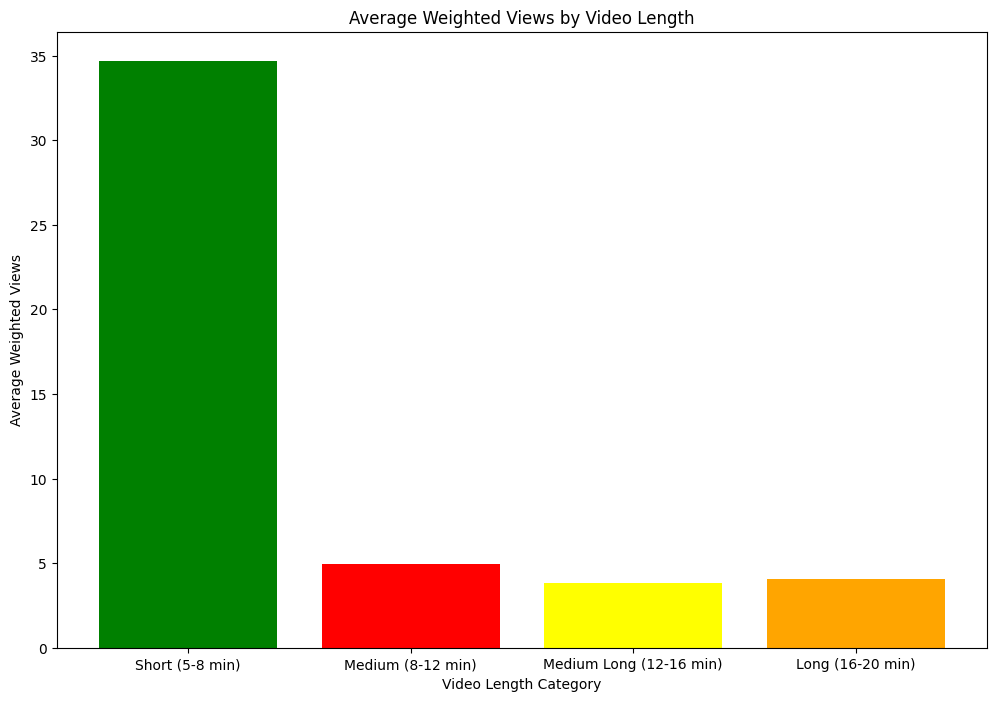

In [75]:
# Convert duration to seconds
def duration_to_seconds(duration):
    try:
        duration = isodate.parse_duration(duration)
        return duration.total_seconds()
    except:
        return 0

all_df['duration_seconds'] = all_df['duration'].apply(duration_to_seconds)

# Create bins for video length
bins = [0, 300, 480, 720, 960, 1200, float('inf')]  # 300 seconds = 5 minutes, 1200 seconds = 20 minutes
labels = [' Very Short (<5 min)', 'Short (5-8 min)', 'Medium (8-12 min)', 'Medium Long (12-16 min)', 'Long (16-20 min)','Very Long (>20 min)']
all_df['length_category'] = pd.cut(all_df['duration_seconds'], bins=bins, labels=labels)

# Calculate average weighted views for each length category
length_category_views = all_df.groupby('length_category')['weighted_views'].mean().reset_index()

# Plot the average weighted views for each length category
plt.figure(figsize=(12, 8))
plt.bar(length_category_views['length_category'], length_category_views['weighted_views'], color=['blue', 'green', 'red','yellow','orange','grey'])
plt.title('Average Weighted Views by Video Length')
plt.xlabel('Video Length Category')
plt.ylabel('Average Weighted Views')
plt.show()

- We notice from here, Shorter videos tend to perform better. Keep it short and straight to the point

##### Optimal Video Length for Maximizing Views

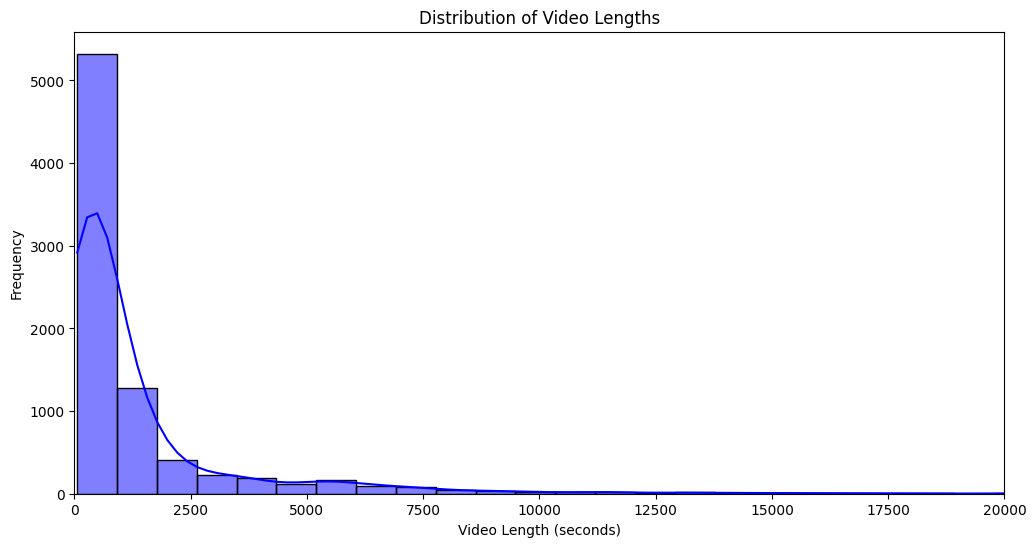

In [76]:
# Plot the distribution of video lengths
plt.figure(figsize=(12, 6))
sns.histplot(all_df['duration_seconds'], bins=50, kde=True, color='blue')
plt.title('Distribution of Video Lengths')
plt.xlabel('Video Length (seconds)')
plt.ylabel('Frequency')
plt.xlim([0,20000])
plt.show()

- Question: What Categories should you be making videos on?

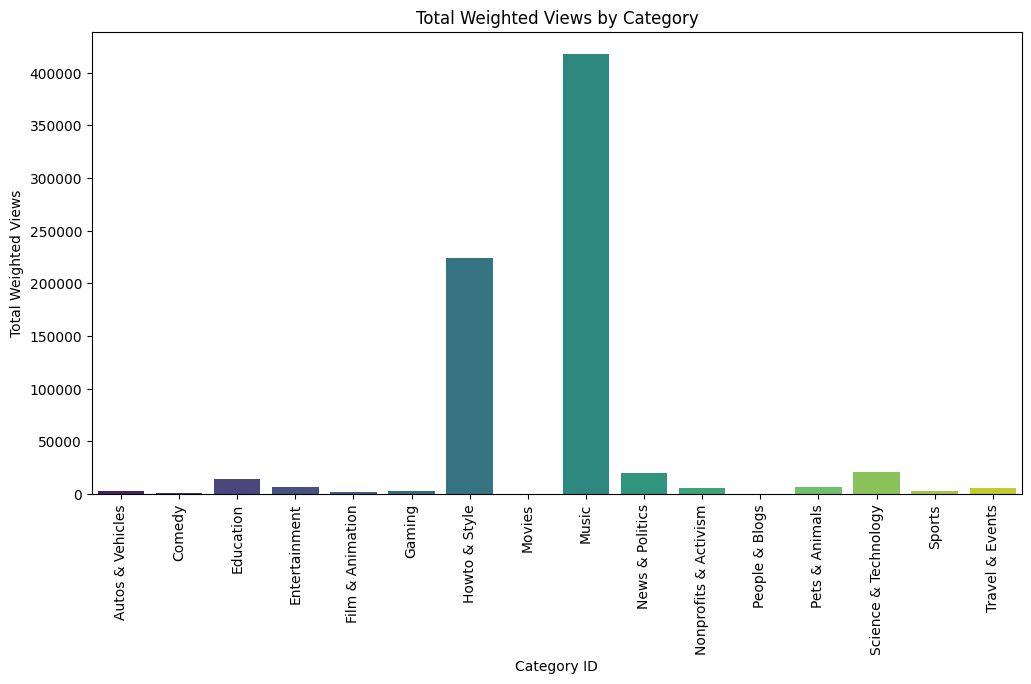

In [77]:
# Group by category_id and sum the weighted_views
category_views = all_df.groupby('category_name')['weighted_views'].sum().reset_index()

# Plot the categories with the most weighted views
plt.figure(figsize=(12, 6))
sns.barplot(data=category_views, x='category_name', y='weighted_views', palette='viridis')
plt.title('Total Weighted Views by Category')
plt.xlabel('Category ID')
plt.xticks(rotation=90)
plt.ylabel('Total Weighted Views')
plt.show()


- What are the top tags we notice on Videos?

In [78]:
# Get tags from the top 10 videos
top_tags = all_df.nlargest(10000, 'weighted_views')['tags']

# Flatten the list of tags and count frequencies
tag_list = [tag for sublist in top_tags for tag in eval(sublist)]
tag_counts = Counter(tag_list)

# Display the most common tags
tag_counts.most_common(10)


[('news', 388),
 ('politics', 269),
 ('News', 268),
 ('funny', 197),
 ('breaking news', 190),
 ('yt', 178),
 ('fb', 176),
 ('msn', 176),
 ('comedy', 163),
 ('gaming', 146)]

- What Words appear in Top Performing Youtube Videos?

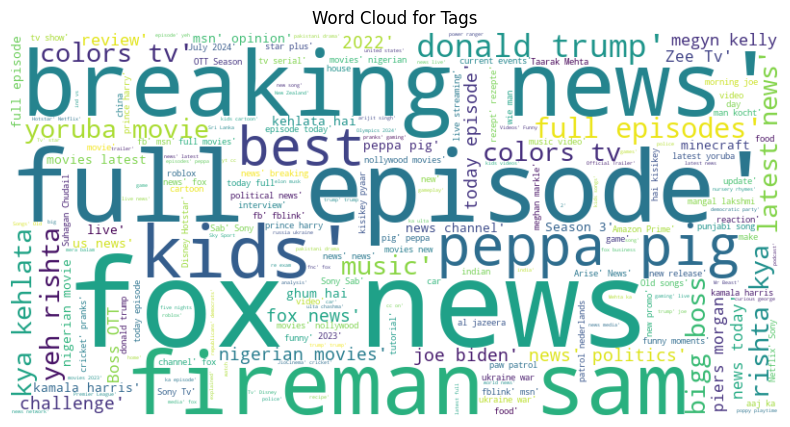

In [79]:
# Generate word cloud for tags
tags = ' '.join(all_df['tags'])
tag_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(WordCloud().stopwords)).generate(tags)

# Plot the word cloud for tags
plt.figure(figsize=(10, 5))
plt.imshow(tag_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Tags')
plt.show()

Question: Popular Topics?

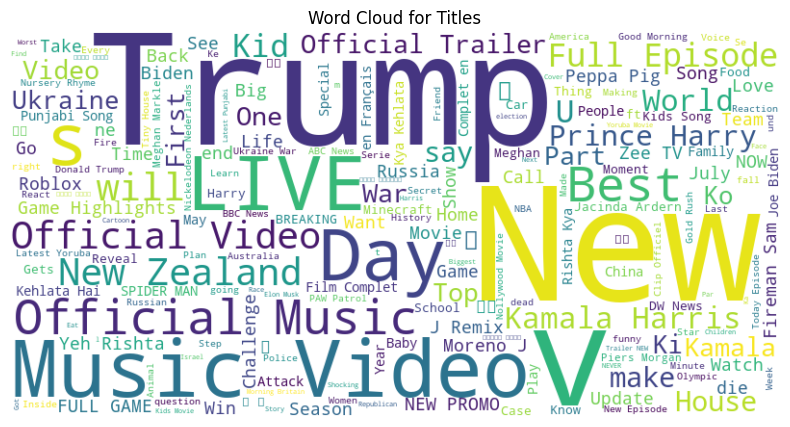

In [80]:
# Preprocess data
youtube_data = youtube_data.dropna(subset=['title', 'tags'])

# Generate word cloud for titles
titles = ' '.join(youtube_data['title'])
title_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(WordCloud().stopwords)).generate(titles)

# Plot the word cloud for titles
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Titles')
plt.show()

Question: What is the time of Upload?

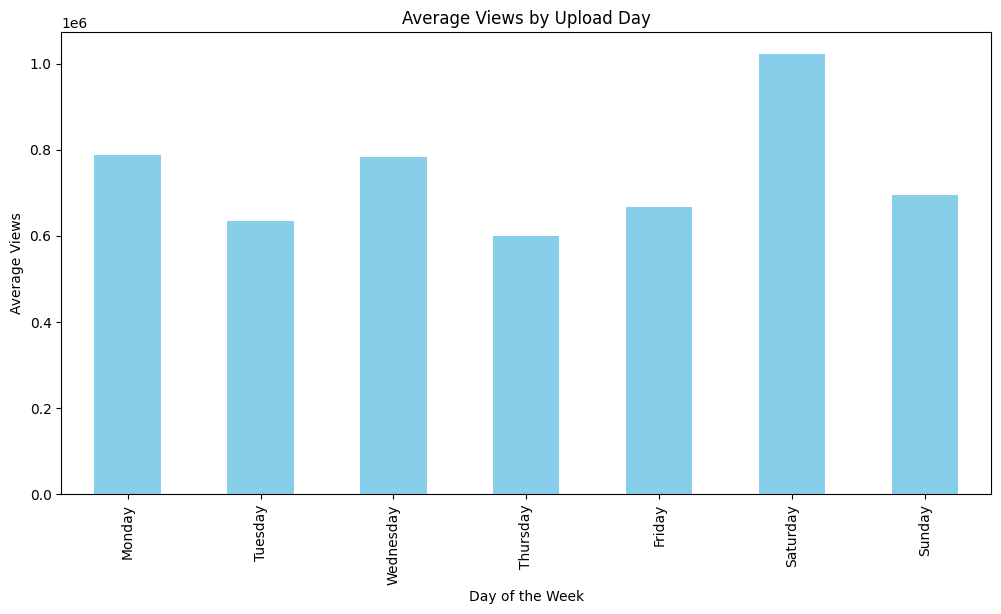

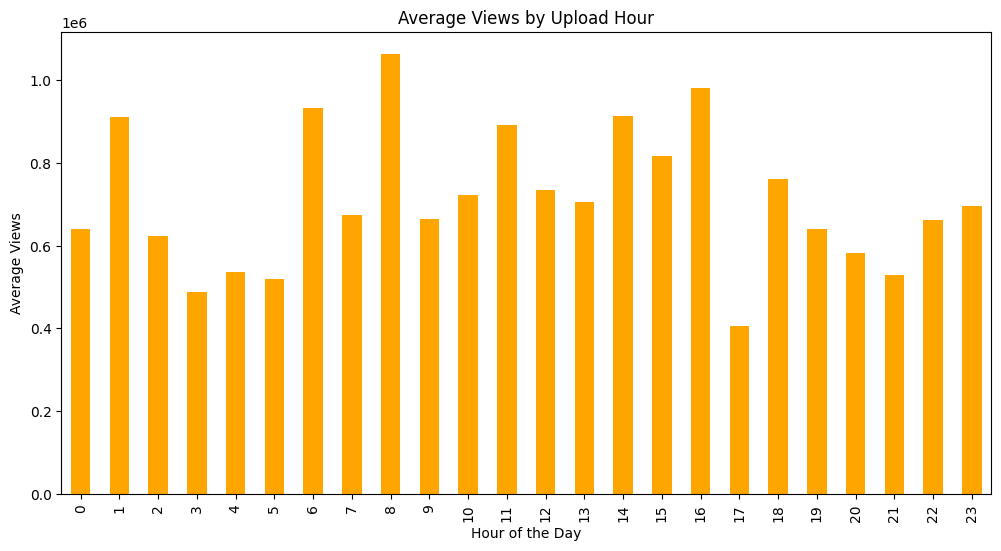

In [81]:
# Extract upload day and hour
all_df['upload_day'] = pd.to_datetime(all_df['published_at']).dt.day_name()
all_df['upload_hour'] = pd.to_datetime(all_df['published_at']).dt.hour

# Average views by upload day
avg_views_by_day = all_df.groupby('upload_day')['view_count'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot average views by upload day
plt.figure(figsize=(12, 6))
avg_views_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Views by Upload Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Views')
plt.show()

# Average views by upload hour
avg_views_by_hour = all_df.groupby('upload_hour')['view_count'].mean()

# Plot average views by upload hour
plt.figure(figsize=(12, 6))
avg_views_by_hour.plot(kind='bar', color='orange')
plt.title('Average Views by Upload Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Views')
plt.show()

- Best day to upload here - Saturdays
- Best time to upload - 8am

- Would be interesting to see what time works best on what days.

Question: What categories get more views than the others?

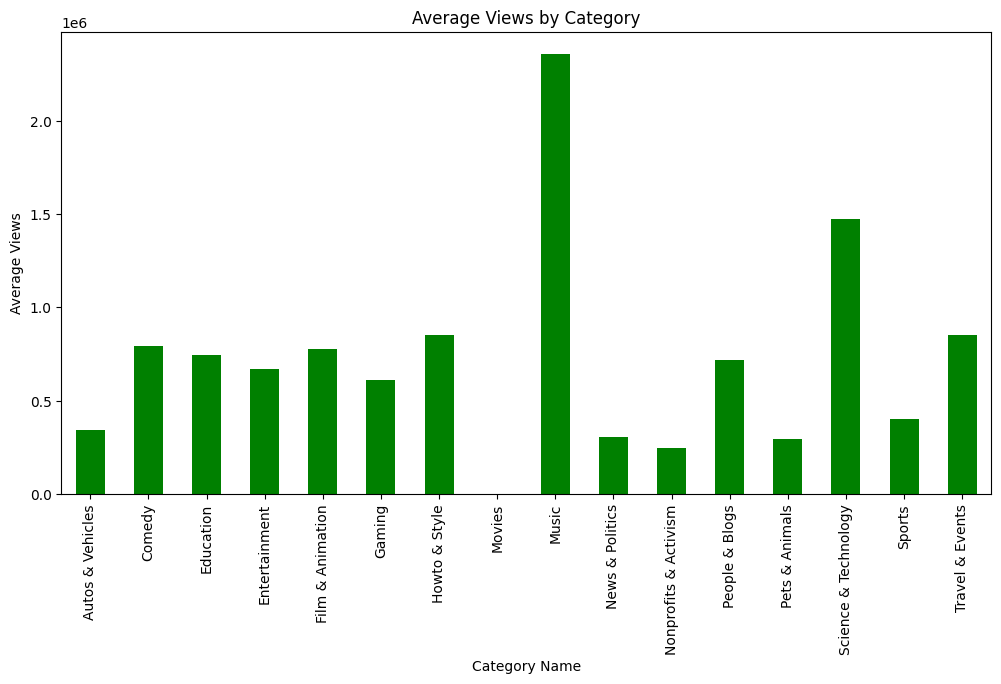

In [82]:
# Average views by category
avg_views_by_category = all_df.groupby('category_name')['view_count'].mean()

# Plot average views by category
plt.figure(figsize=(12, 6))
avg_views_by_category.plot(kind='bar', color='green')
plt.title('Average Views by Category')
plt.xlabel('Category Name')
plt.ylabel('Average Views')
plt.show()


Question: What is the Imapct of Title Length on the performance of a Youtube Video?

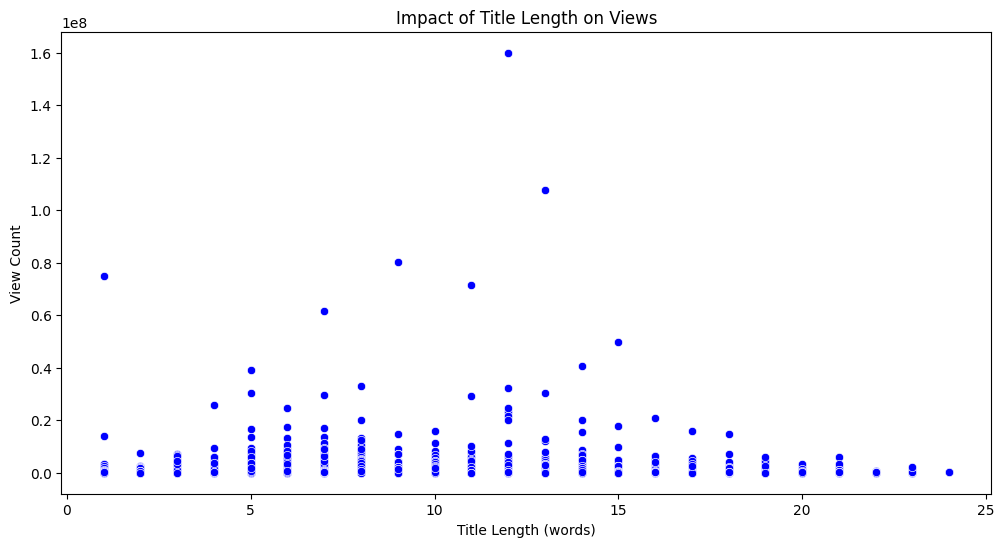

In [83]:
# Calculate title and description lengths
all_df['title_length'] = all_df['title'].apply(lambda x: len(x.split()))
all_df['description_length'] = all_df['description'].fillna('').apply(lambda x: len(x.split()))

# Plot the impact of title length on views
plt.figure(figsize=(12, 6))
sns.scatterplot(data=all_df, x='title_length', y='view_count', color='blue')
plt.title('Impact of Title Length on Views')
plt.xlabel('Title Length (words)')
plt.ylabel('View Count')
plt.show()


- Notice the Guassian/bell curve for the Title Length. Title Length average over around 10 - 15 Words.

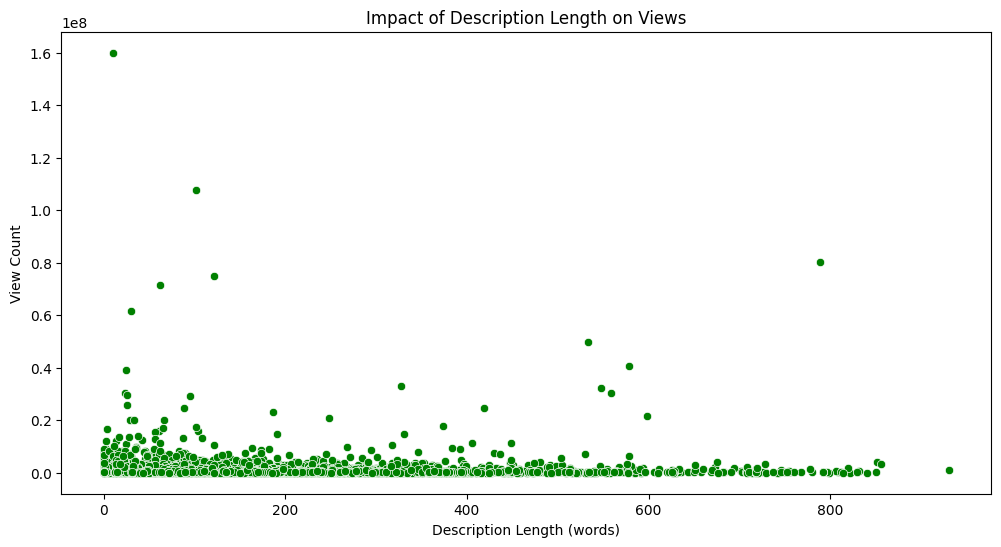

In [84]:
# Plot the impact of description length on views
plt.figure(figsize=(12, 6))
sns.scatterplot(data=all_df, x='description_length', y='view_count', color='green')
plt.title('Impact of Description Length on Views')
plt.xlabel('Description Length (words)')
plt.ylabel('View Count')
plt.show()

Question: What is the average age of Youtube channels with the best videos?

In [85]:
# Convert channel_creation_date to datetime
all_df['channel_creation_date'] = pd.to_datetime(all_df['channel_creation_date']).dt.tz_localize(None)

# Calculate days since channel creation
all_df['days_since_channel_creation'] = (pd.Timestamp.now().normalize() - all_df['channel_creation_date']).dt.days

# Filter the top 2000 videos based on weighted views
top_videos = all_df.nlargest(2000, 'weighted_views')

# Calculate the average age of the channels with the best weighted views videos
average_age_days = top_videos['days_since_channel_creation'].mean()
average_age_years = average_age_days / 365

print(f'Average age of YouTube channels with the best weighted views videos: {average_age_years:.2f} years')

# To present the result in a user-friendly way, you can convert the days to years and months
years = int(average_age_days // 365)
months = int((average_age_days % 365) // 30)
days = int((average_age_days % 365) % 30)

print(f'Average age of YouTube channels with the best weighted views videos: {years} years, {months} months, and {days} days')

Average age of YouTube channels with the best weighted views videos: 7.21 years
Average age of YouTube channels with the best weighted views videos: 7 years, 2 months, and 16 days


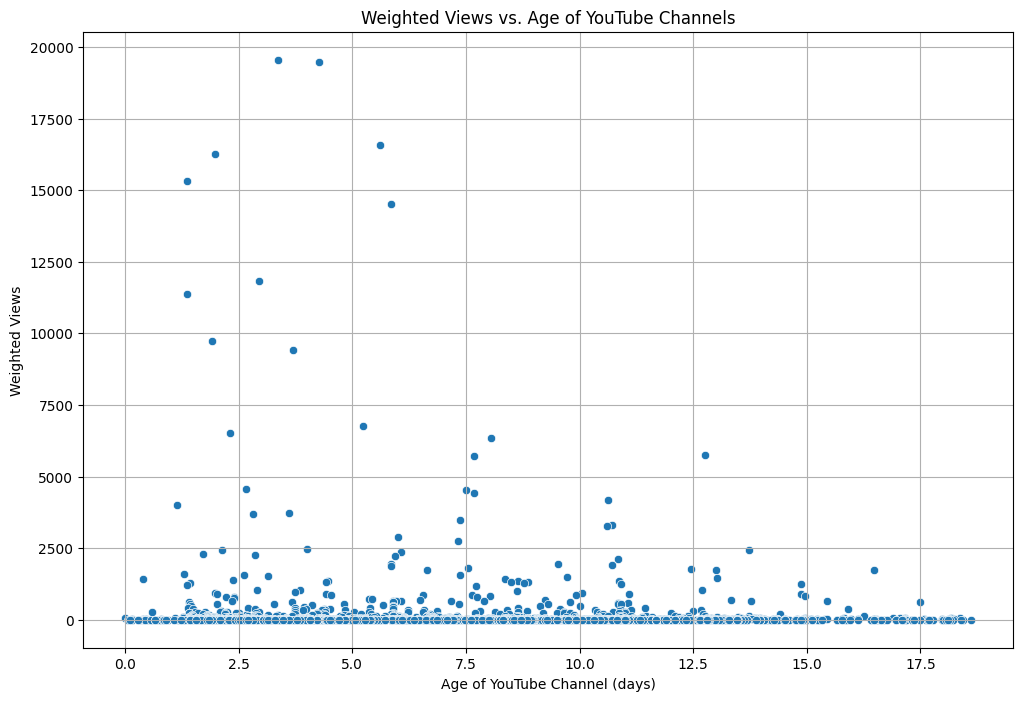

In [86]:
# Convert days since channel creation to years
top_videos['years_since_channel_creation'] = top_videos['days_since_channel_creation'] / 365

# Remove outliers where weighted_views are above 50,000
top_videos = top_videos[top_videos['weighted_views'] <= 20000]

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='years_since_channel_creation', y='weighted_views', data=top_videos)
plt.title('Weighted Views vs. Age of YouTube Channels')
plt.xlabel('Age of YouTube Channel (days)')
plt.ylabel('Weighted Views')
plt.grid(True)
plt.show()

Questions: 
- How many Subscribers do you need to get big views on Youtube?
- How many videos do you need to make a high view video on Youtube?

In [87]:
# Convert channel_creation_date to datetime
all_df['channel_creation_date'] = pd.to_datetime(all_df['channel_creation_date']).dt.tz_localize(None)

# Calculate days since channel creation
all_df['days_since_channel_creation'] = (pd.Timestamp.now().normalize() - all_df['channel_creation_date']).dt.days

# Filter the top 1000 videos based on weighted views
top_videos = all_df.nlargest(100, 'weighted_views')

# Remove outliers where weighted_views are above 50,000
top_videos = top_videos[top_videos['weighted_views'] <= 50000]

# Calculate the average subscriber count and video count for the top videos
average_subscriber_count = top_videos['subscriber_count'].mean()
average_video_count = top_videos['channel_video_count'].mean()

print('Considering the top 100 videos in our Dataset ...')
print(f'You need about {average_subscriber_count:,.0f} to make a highly weighted video.')
print(f'You need to make about {average_video_count:,.0f} videos to make a high view video.')

Considering the top 100 videos in our Dataset ...
You need about 2,049 to make a highly weighted video.
You need to make about 72 videos to make a high view video.


Question: Is there a relationship between a channels description and the number of views their videos get on Youtube?

Correlation between description length and view count:
                    description_length  view_count
description_length            1.000000    0.023905
view_count                    0.023905    1.000000


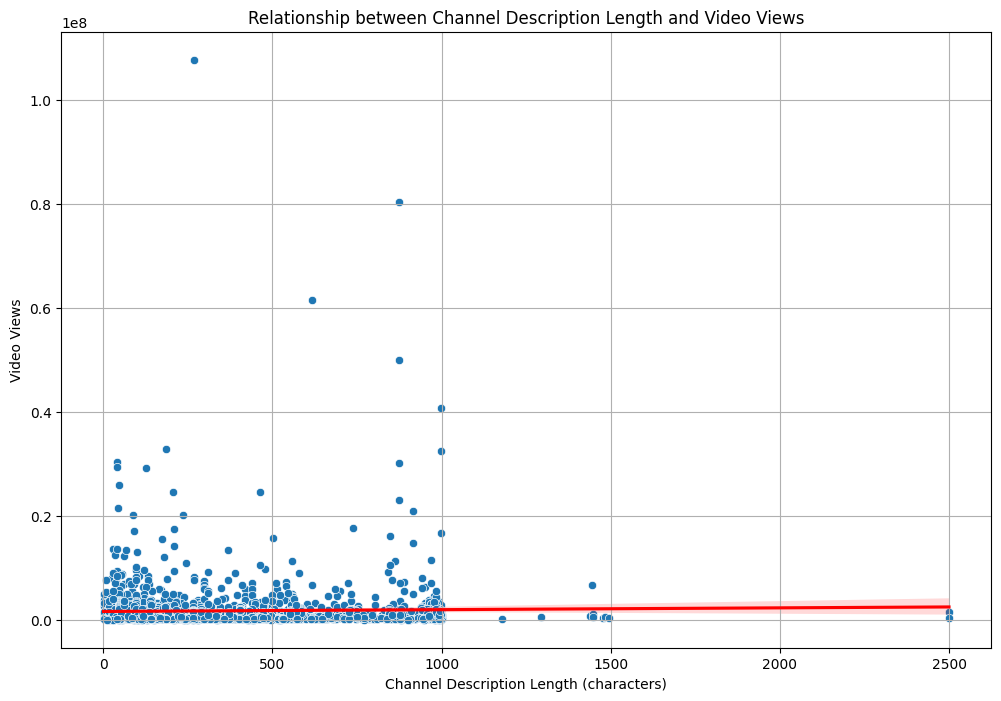

In [88]:
# Remove rows with missing target values
all_df = all_df.dropna(subset=['view_count', 'channel_description'])

# Feature extraction: Length of the channel description
all_df['description_length'] = all_df['channel_description'].apply(lambda x: len(x) if isinstance(x, str) else 0)

# Calculate weighted views
all_df['weighted_views'] = all_df['view_count'] / all_df['subscriber_count']

# Filter the top 2000 videos based on weighted views
top_videos = all_df.nlargest(2000, 'weighted_views')

# Remove outliers where weighted_views are above 50,000
top_videos = top_videos[top_videos['weighted_views'] <= 50000]

# Perform correlation analysis
correlation = top_videos[['description_length', 'view_count']].corr()

print('Correlation between description length and view count:')
print(correlation)

# Visualization
plt.figure(figsize=(12, 8))
sns.scatterplot(x='description_length', y='view_count', data=top_videos)
sns.regplot(x='description_length', y='view_count', data=top_videos, scatter=False, color='red')
plt.title('Relationship between Channel Description Length and Video Views')
plt.xlabel('Channel Description Length (characters)')
plt.ylabel('Video Views')
plt.grid(True)
plt.show()

- No serious Correlation seen

Question: Engagement Effects?

In [89]:
# Filter the top 2000 videos based on weighted views
top_videos = youtube_data.nlargest(5000, 'weighted_views')

# Remove outliers where weighted_views are above 50,000
top_videos = top_videos[top_videos['weighted_views'] <= 50000]

# Calculate average like-to-view ratio for top-performing videos
top_videos['like_to_view_ratio'] = top_videos['like_count'] / top_videos['view_count']
average_like_to_view_ratio = top_videos['like_to_view_ratio'].mean()
print(f'That is for every 10 likes your videos get a guaranteed {(1/average_like_to_view_ratio)*10:.2f} Views')

# Calculate average comment-to-view ratio for top-performing videos
top_videos['comment_to_view_ratio'] = top_videos['comment_count'] / top_videos['view_count']
average_comment_to_view_ratio = top_videos['comment_to_view_ratio'].mean()
print(f'That is for every 10 comments your videos get a guaranteed {(1/average_comment_to_view_ratio)*10:.2f} Views')

That is for every 10 likes your videos get a guaranteed 447.96 Views
That is for every 10 comments your videos get a guaranteed 6170.63 Views
